In [1]:
from scipy import stats

In [2]:
from scipy import optimize

In [3]:
import numpy as np?

Object `np` not found.


In [8]:
import numpy as np

In [4]:

import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set(style="whitegrid")

In [9]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

In [10]:
np.mean(x)

3.1

In [11]:
np.median(x)

3.0

In [12]:
x.min(), x.max()

(0.9, 6.7)

In [13]:
x.var()

3.0700000000000007

In [14]:
x.std()

1.7521415467935233

In [15]:
x.var(ddof=1)

3.5085714285714293

In [16]:
x.std(ddof=1)

1.8731181032095732

In [17]:
np.random.rand()

0.017740631183047584

In [18]:

np.random.randn()

0.8292407463369708

In [19]:
np.random.rand(5)

array([0.70314783, 0.21122123, 0.93997361, 0.38144008, 0.56716478])

In [20]:
np.random.randn(2, 4)

array([[ 1.64603913, -0.18239499,  0.81903311, -0.60407549],
       [-0.55997313,  0.84804627, -1.43853606, -0.79073775]])

In [21]:
np.random.randint(10, size=10)

array([1, 4, 9, 2, 0, 2, 8, 6, 7, 2])

In [23]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[10, 12, 11, 16, 17, 13, 10, 15, 16, 18],
       [10, 19, 10, 15, 13, 17, 17, 19, 10, 18]])

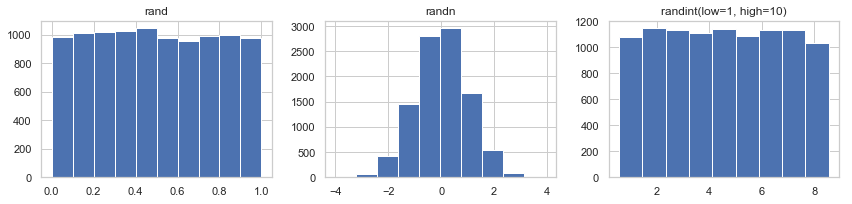

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()

In [25]:
np.random.choice(10, 5, replace=False)

array([8, 0, 6, 3, 1])

In [26]:
np.random.seed(123456789)

In [27]:
np.random.rand()

0.532833024789759

In [28]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [29]:
prng = np.random.RandomState(123456789)

In [30]:
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [31]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [32]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [33]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [34]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [35]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

In [36]:
X = stats.norm(1, 0.5)


In [37]:
X.mean()

1.0

In [38]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

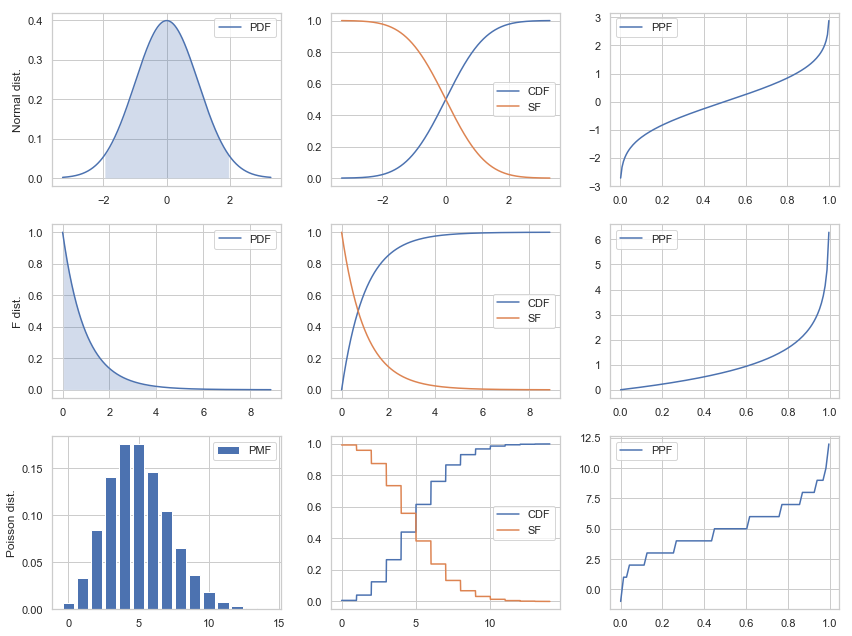

In [39]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()

In [40]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

//anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


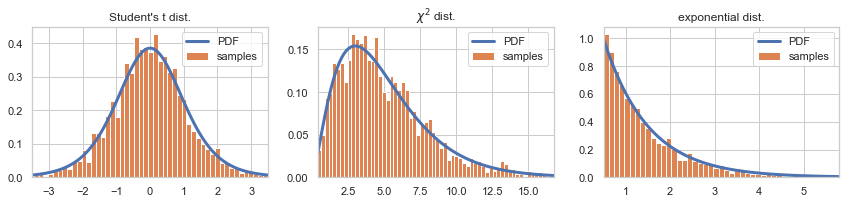

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()

In [42]:
X = stats.chi2(df=5)

In [43]:
X_samples = X.rvs(100)

In [44]:
kde = stats.kde.gaussian_kde(X_samples)

In [45]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

In [46]:
x = np.linspace(0, 20, 100)

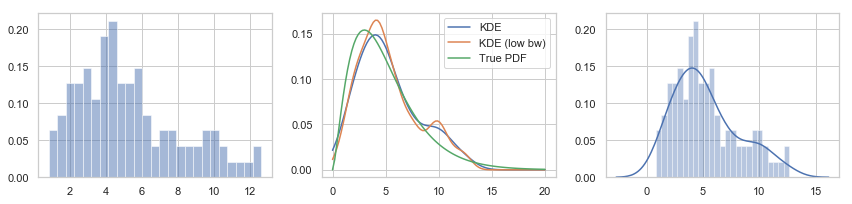

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()